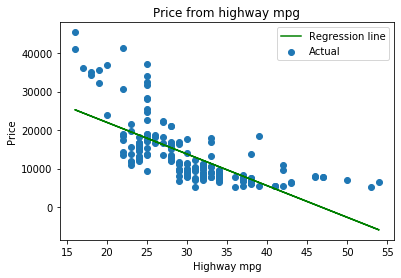

Intercept: [38423.30585816], slope: [-821.73337832]


In [1]:
# Learn different regressions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import os
import seaborn as sns
import sklearn.linear_model as lm

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Read the clean model
df = pd.read_csv("data" + os.path.sep + "autos_85_clean.csv")

# Instantiate the linear model
lm = lm.LinearRegression()

X = df[["highway-mpg"]]
Y = df[["price"]]

# Fit the model
lm.fit(X, Y)

# Predict the values
Yhat = lm.predict(X)

# Plot the results
plt.scatter(X, Y)
plt.plot(X, Yhat, color='green')
plt.xlabel("Highway mpg")
plt.ylabel("Price")
plt.title("Price from highway mpg")
plt.legend(['Regression line', 'Actual'])
plt.show() 
plt.close()
    
# Print the intercept and the slope
print("Intercept: " + str(lm.intercept_) + ", slope: " + str(lm.coef_[0]))

In [2]:
# Train with several predictors
columns = list(df)
print("Columns: " + str(columns))

# Choose the predictors
X = df[["horsepower", "engine-size", "curb-weight", "highway-mpg"]]

# Train the model
lm.fit(X, Y)

# Predict the values
Yhat = lm.predict(X)

# Print the intercept and the slope
print("\nIntercept: " + str(lm.intercept_) + ", slope: " + str(lm.coef_))

Columns: ['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-lpg', 'highway-mpg', 'price', 'price-binned', 'horsepower-binned', 'diesel', 'gas']

Intercept: [-15831.9309603], slope: [[53.66247317 81.44600167  4.70938694 36.55016267]]


(0, 47754.49406536507)

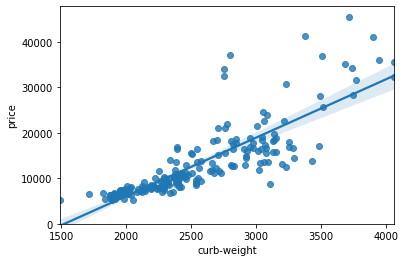

In [3]:
# Use the seaborn for a regression plot
sns.regplot(x  = "curb-weight", y = "price", data = df)
plt.ylim(0,)

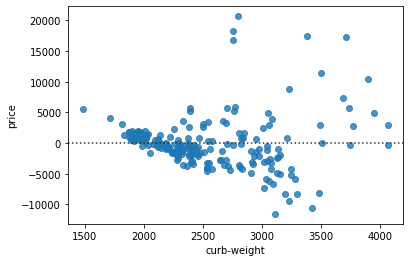

In [4]:
# Plot the residuals with seaborn: curb-weight
sns.residplot(x  = "curb-weight", y = "price", data = df)

# The higher values of "curb-weight" the error grows so the linear assumption is not good

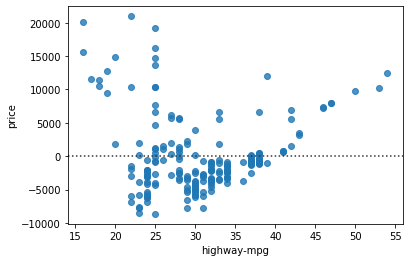

In [5]:
# Plot the residuals with seaborn: highway-mpg
sns.residplot(x  = "highway-mpg", y = "price", data = df)

# The residuals again show a curvature so the linear assumption is not good


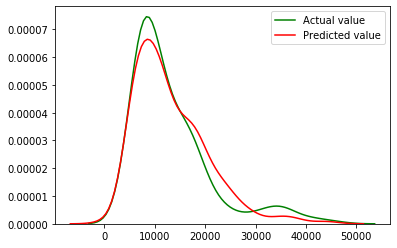

In [6]:
# Comparing the distribution plots of the actual and predicted values also allows to assess the quality of the model

def plot_distributions(Y, Yhat):
    ax1 = sns.distplot(Y, hist = False, color = "green", label = "Actual value")
    sns.distplot(Yhat, hist = False, color = "red", label = "Predicted value", ax = ax1)
    plt.show() 
    plt.close()

plot_distributions(Y, Yhat)

In [7]:
def PlotPolly(model, independent_variable, dependent_variabble, Name): 
    x_new = np.linspace(15, 55, 100) 
    y_new = model(x_new) 
    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial. Fit with Matplotlib for Price — Length') 
    ax = plt.gca() 
    ax.set_facecolor((0.898, 0.898, 0.898)) 
    fig = plt.gcf() 
    plt.xlabel(Name)
    plt.ylabel('Price of Cars') 
    plt.show() 
    plt.close()

Coefficients: 

[-1.55663829e+00  2.04754306e+02 -8.96543312e+03  1.37923594e+05]
Model: 

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


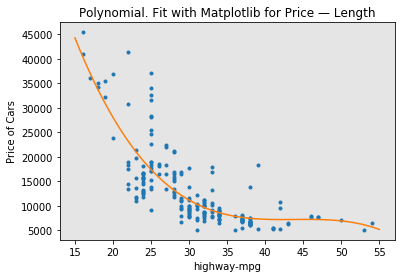

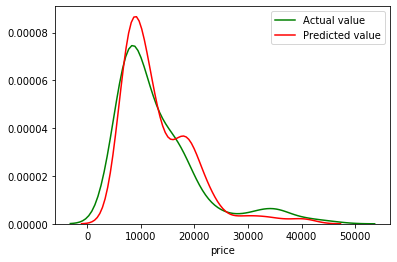

The R-square value is:  0.674194666390652


In [8]:
# Perform third order Polynomial Regression with NumPy
X = df["highway-mpg"]
Y = df["price"]
# First fit the model to get the coefficient
fit = np.polyfit(X, Y, 3)

print("Coefficients: \n")
print(fit)

print("Model: \n")
pol = np.poly1d(fit)
print(pol)

# Evaluate the model
Yhat = pol(X)

# Plot the polinomial
PlotPolly(pol, X, Y, "highway-mpg")

#Plot the distributions
plot_distributions(Y, Yhat)

# Compute the R-square score
r_squared = r2_score(Y, pol(X))
print('The R-square value is: ', r_squared)

In [9]:
# NumPy can not handle multi-dimensional polynomial regression
# Therefore we use the sklearn for that, here we can transform 
# features into polynomial features
pr = PolynomialFeatures(degree = 2, include_bias = False)

x_polly = pr.fit_transform(df[["horsepower", "engine-size", "curb-weight", "highway-mpg"]])

# Now we should be use the transformed ones for polynomial regression with NumPy

In [10]:
# For standartization we can use the StandardScaler to scale all features simultaneously

# Create and fit the scaler
scaler = StandardScaler()
scaler.fit(df[["horsepower", "engine-size", "curb-weight", "highway-mpg"]])

# Transform the data into scaled one
x_scaled = scaler.transform(df[["horsepower", "engine-size", "curb-weight", "highway-mpg"]])

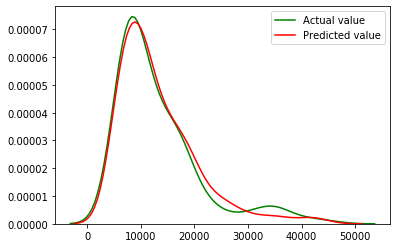

In [11]:
# Pipeline libraries, the steps typically look as follows: Normalizaion > Polynomial Transform > Regression
# Pipelines allow to perform series of transformation getting the predictions in the end

# Create the list of tuples with the names mapped to instances of pipeline elements
descriptor = [('scale', StandardScaler()), \
              ('polynomial', PolynomialFeatures(degree = 2)), \
              ('model', LinearRegression())]

# Create the pipeline from the object
pipe = Pipeline(descriptor)

# Train the pipeling on the data
X = df[["horsepower", "engine-size", "curb-weight", "highway-mpg"]]
Y = df[["price"]]
pipe.fit(X, Y)

# Predict the data
Yhat = pipe.predict(X)

# Plot the distributions
plot_distributions(Y, Yhat)

In [12]:
# Mean Squared Error (MSE)
# The average squared difference between 
# the estimated values and the actual value.
# Or the expected value of the squared error loss.
# The lower the value is - the better

mse_val = mean_squared_error(Y, Yhat)

print( "Mean Squared Error: "+ str(mse_val))


Mean Squared Error: 9655418.831364287


In [13]:
# The Coefficient of Determination R^2 (R-squared)
# This is the proportion of the data variability that
# is explained by the prediction (e.g. regression model)
# Is usually between 0 and 1 and the higher the better
# Getting 0 means that the model result is about as 
# good as using the mean of the data points.
# WATNING: if R^2 is negative then we have an overfitting!
# The higher the value is the better, 1 is maximum

X = df[["horsepower"]]
Y = df[["price"]]

# Fit the model
lm.fit(X, Y)

# Compute the coefficient
r2 = lm.score(X, Y)

print("R-squared: " + str(r2))

#There result of 0.65 means that the model explains ablot 65% of the data variability

R-squared: 0.6556611105366588


In [14]:
# Prediction and Decision Making
# Always evaluate the model after it is trained

X = df[["highway-mpg"]]
Y = df[["price"]]

# Fit the model
lm.fit(X, Y)

# Predict the price
mpg = 30
price = lm.predict([[mpg]])

print("The preictied price for a car of " + str(mpg) + " mpg is: " + str(price[0][0]))
print("The model slope: " + str(lm.coef_));

# The slope implies that the car price will drop by about
# -821$ by each extra galon. The results seem reasosnable.

The preictied price for a car of 30 mpg is: 13771.304508499637
The model slope: [[-821.73337832]]


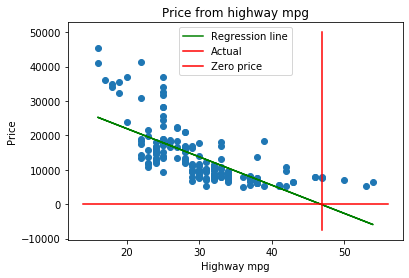

In [15]:
# If we plot the model then we see that for
# some range of mpg the model makes negative 
# predictions. So it should not be used there.

Yhat = lm.predict(X)

# Plot the results
plt.scatter(X, Y)
plt.plot(X, Yhat, color = 'green')
plt.plot([14, 56], [0, 0], color = 'red')
plt.plot([47, 47], [-7500, 50000], color = 'red')
plt.xlabel("Highway mpg")
plt.ylabel("Price")
plt.title("Price from highway mpg")
plt.legend(['Regression line', 'Actual', 'Zero price'])
plt.show() 
plt.close()

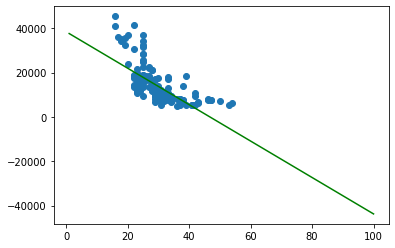

In [16]:
# Generat a new inputs vector and predict the values
X1 = np.arange(1, 101, 1)
#print(X1)

# From a row verctor into a column
X1 = X1.reshape(-1, 1)
#print(X1)

# Predict the prices
Yhat = lm.predict(X1)

# Plot the results
plt.scatter(X, Y)
plt.plot(X1, Yhat, color = 'green')


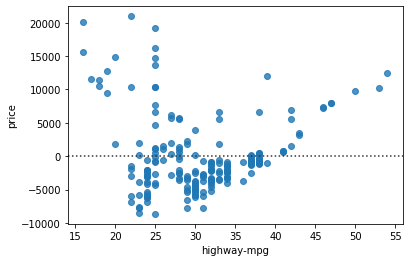

In [17]:
# The linear regression does not seem to be a good fit here 
sns.residplot(x  = "highway-mpg", y = "price", data = df)

# The residuals plit shows a non uniform distribution of error

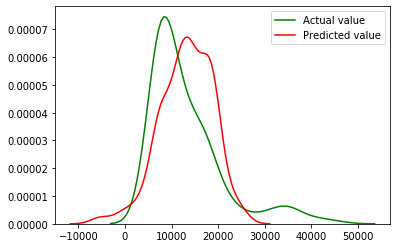

In [18]:
# The distribution plot, is also somewhat off
Yhat = lm.predict(X)
plot_distributions(Y, Yhat)

In [19]:
# The mean squared error MSE
mse_val = mean_squared_error(Y, Yhat)

print( "Mean Squared Error: "+ str(mse_val))

print("Model intercept: " + str(lm.intercept_))

# Is equal to 31635042 The larger the error the more variane
# of the data is allowed arround the regression line

# However the lower MSE does not always mean a better fit
# Multiple linear regression (MLR) will have a lower MSE than
# the Single linear regression (SLR) as there will be more
# predictors included and this reduces the MSE
# The polynomial regression wil therefore also have lower MSE
# Than the SLR and MLR, as there will be multiplications of
# the predictors added.

Mean Squared Error: 31635042.944639888
Model intercept: [38423.30585816]


In [20]:
# The R-squared R^2
r2 = lm.score(X, Y)

print("R-squared: " + str(r2))

# Is equal to 0.496 which means that less 
# than 50% of the data variance is explaned

# However some authors suggest that R^2 shall be >= 0.10

# As for MSE the R^2 can depend on the model the same.
# However here the relation is inversed but is present.

R-squared: 0.4965911884339176
